## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Customer Segmentation

## Load the Customer Purchase Data

In [2]:
customer_data = pd.read_csv('CustomerPurchaseData.csv')
print(customer_data.shape)
customer_data.head()

(2239, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,387,1976,Basic,Married,7500.0,0,0,13/11/12,59,6,...,8,0,0,0,0,0,0,3,11,0.0
1,8373,1979,Basic,Together,24594.0,1,0,10/12/13,94,1,...,5,0,0,0,0,0,0,3,11,0.0
2,5342,1976,Basic,Divorced,9548.0,1,0,08/08/12,31,0,...,8,0,0,0,0,0,0,3,11,0.0
3,2563,1961,Basic,Married,28249.0,0,0,15/06/14,80,1,...,6,0,0,0,0,0,0,3,11,0.0
4,9733,1978,Basic,Together,24882.0,1,0,09/09/12,52,1,...,6,1,0,0,0,0,0,3,11,0.0


In [3]:
#Checking null values
customer_data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                  1
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntSnacksProds          0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response               23
dtype: int64

## Data Cleaning and Preprocessing

In [4]:
# Handling missing values
customer_data['Income'].fillna(0, inplace=True)
customer_data['Response'].fillna(customer_data['Response'].mode()[0], inplace=True)

customer_data['Dt_Customer'] = pd.to_datetime(customer_data['Dt_Customer'])

/var/folders/67/4t6dp9k533z60p8b01gt6cdc0000gn/T/ipykernel_2107/695502584.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer_data['Dt_Customer'] = pd.to_datetime(customer_data['Dt_Customer'])


In [5]:
customer_data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntSnacksProds         0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

## Feature Engineering

In [6]:
# Convert categorical variables to numerical using OneHotEncoder or get_dummies
customer_data = pd.get_dummies(customer_data, columns=['Education', 'Marital_Status'])
customer_data.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,387,1976,7500.0,0,0,2012-11-13,59,6,16,11,...,False,False,False,False,False,True,False,False,False,False
1,8373,1979,24594.0,1,0,2013-10-12,94,1,3,6,...,False,False,False,False,False,False,False,True,False,False
2,5342,1976,9548.0,1,0,2012-08-08,31,0,1,3,...,False,False,False,False,True,False,False,False,False,False
3,2563,1961,28249.0,0,0,2014-06-15,80,1,9,7,...,False,False,False,False,False,True,False,False,False,False
4,9733,1978,24882.0,1,0,2012-09-09,52,1,4,10,...,False,False,False,False,False,False,False,True,False,False


## Exploratory Data Analysis (EDA)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


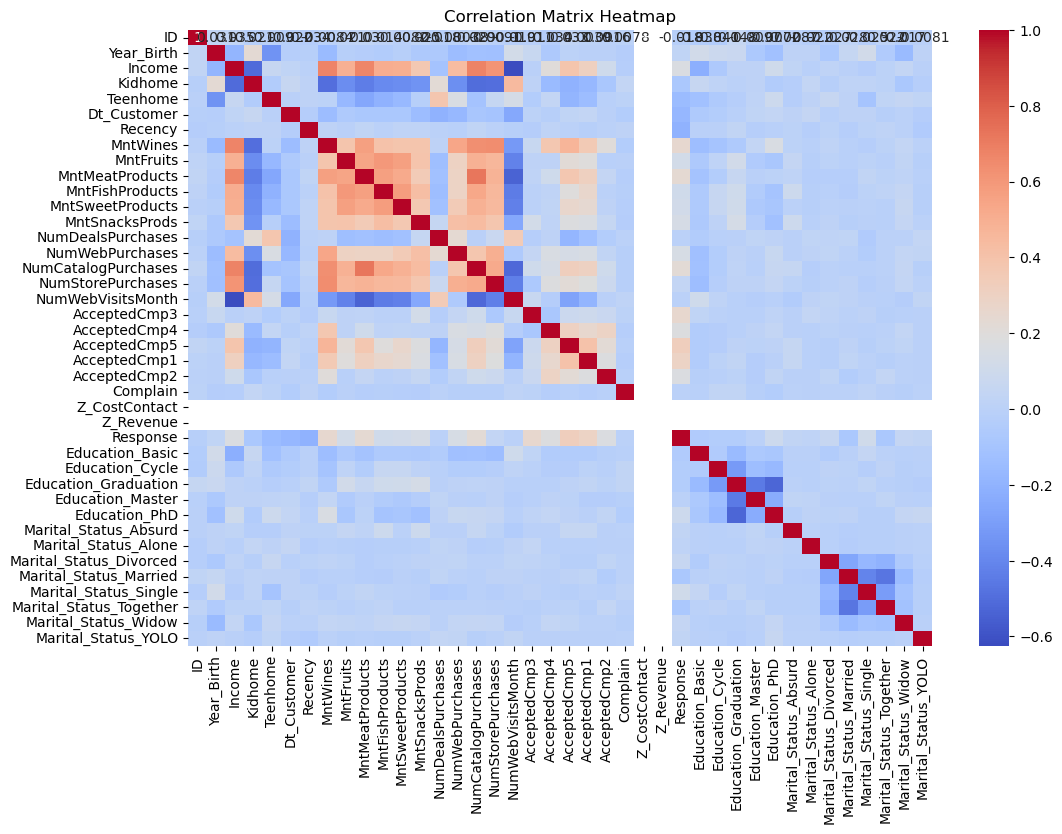

In [7]:
# Correlation Matrix Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(customer_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

## Customer Segmentation: Clustering using KMeans

In [8]:
# Selecting relevant features
X = customer_data[['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                   'MntSweetProducts', 'MntSnacksProds', 'NumDealsPurchases', 'NumWebPurchases', 
                   'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]

In [9]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Determining optimal number of clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

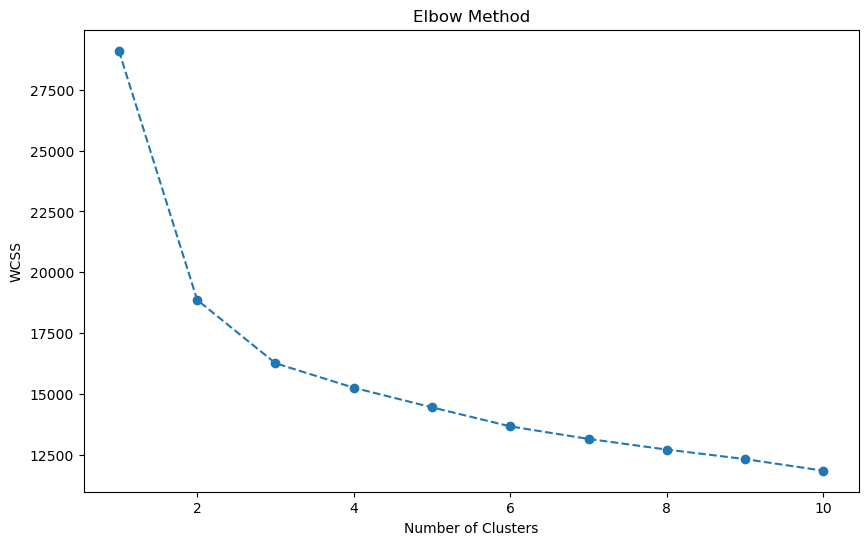

In [11]:
# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
# From the Elbow Method, we select the number of clusters as 4
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(X_scaled)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Model Evaluation

In [13]:
# Silhouette Coefficient
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_scaled, customer_data['Cluster'])
print(f'Silhouette Coefficient: {silhouette_avg}')

Silhouette Coefficient: 0.25160735014401


# Churn Prediction

In [14]:
## Load the User App Behaviour Data

In [15]:
app_behaviour_data = pd.read_csv('User+App+Behaviour.csv')
print(app_behaviour_data.shape)
app_behaviour_data.head()

(5630, 20)


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [16]:
#Checking null values
app_behaviour_data.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

## Feature Engineering

In [17]:
# Convert categorical variables to numerical using get_dummies
app_behaviour_data = pd.get_dummies(app_behaviour_data, columns=['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus'])

#Handling Null Values
app_behaviour_data['Tenure'].fillna(0, inplace=True)
app_behaviour_data['HourSpendOnApp'].fillna(app_behaviour_data['HourSpendOnApp'].mean(), inplace=True)
app_behaviour_data['OrderAmountHikeFromlastYear'].fillna(app_behaviour_data['OrderAmountHikeFromlastYear'].mean(), inplace=True)
app_behaviour_data['CouponUsed'].fillna(0, inplace=True)
app_behaviour_data['OrderCount'].fillna(app_behaviour_data['OrderCount'].median(), inplace=True)

# Drop unnecessary columns with null values
app_behaviour_data.drop(columns=['CustomerID'], inplace=True)

# Drop rows with null values in few columns
app_behaviour_data.dropna(subset=['WarehouseToHome', 'DaySinceLastOrder'], inplace=True)


app_behaviour_data.shape


(5072, 35)

In [18]:
app_behaviour_data.isnull().sum()

Churn                                    0
Tenure                                   0
CityTier                                 0
WarehouseToHome                          0
HourSpendOnApp                           0
NumberOfDeviceRegistered                 0
SatisfactionScore                        0
NumberOfAddress                          0
Complain                                 0
OrderAmountHikeFromlastYear              0
CouponUsed                               0
OrderCount                               0
DaySinceLastOrder                        0
CashbackAmount                           0
PreferredLoginDevice_Computer            0
PreferredLoginDevice_Mobile Phone        0
PreferredLoginDevice_Phone               0
PreferredPaymentMode_CC                  0
PreferredPaymentMode_COD                 0
PreferredPaymentMode_Cash on Delivery    0
PreferredPaymentMode_Credit Card         0
PreferredPaymentMode_Debit Card          0
PreferredPaymentMode_E wallet            0
PreferredPa

## Exploratory Data Analysis (EDA)

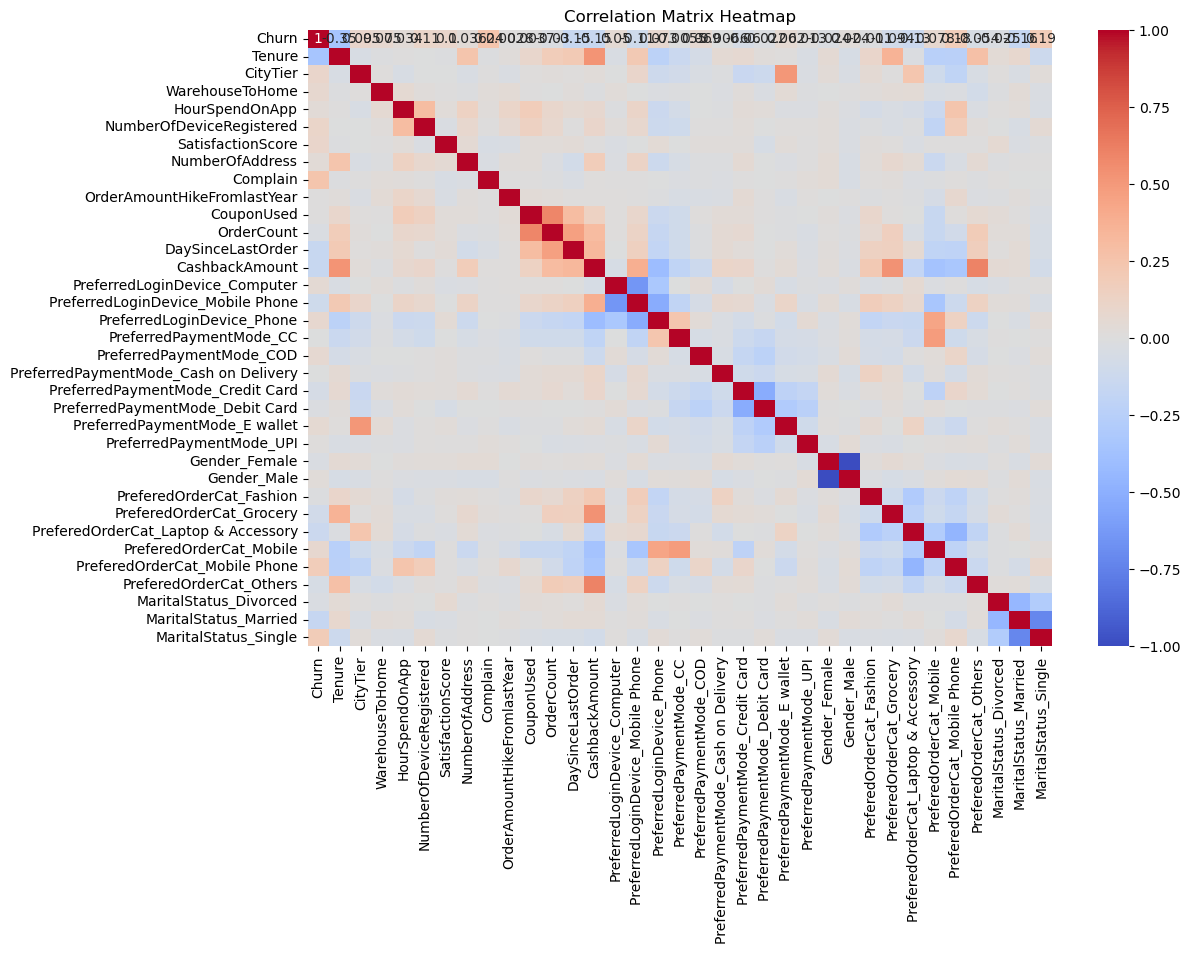

In [19]:
# Correlation Matrix Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(app_behaviour_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

## Data Preprocessing and Feature Scaling

In [20]:
# Standardization
scaler = StandardScaler()
X = scaler.fit_transform(app_behaviour_data.drop(columns=['Churn']))

## Model Building

In [21]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, app_behaviour_data['Churn'], test_size=0.2, random_state=42)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Model Evaluation

In [22]:
# Predictions
y_pred = rf_classifier.predict(X_test)

In [23]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[860   3]
 [ 23 129]]


In [24]:
# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.9743842364532019
Precision: 0.9772727272727273
Recall: 0.8486842105263158
F1 Score: 0.9084507042253522
